In [22]:
# Dependencies
import numpy as np
import datetime as dt
import sqlite3
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [10]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)
print(june_results)


SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [ ]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results)

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])
june_df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [13]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## Skill Drill: Same procedure as before using only Pandas

In [14]:
# Connect to database
dat = sqlite3.connect('hawaii.sqlite')
# Extract all the rows from the database
query = dat.execute("SELECT * From Measurement")
cols = [column[0] for column in query.description]
# Convert dabase to Pandas DataFrame
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
# Add a column 'mm' with the month number for each date
results['mm'] = pd.to_datetime(results['date']).dt.month
# Filter DatFarme to only show rows where column 'mm' is equal to '6' (month of June)
rslt_df=results[results['mm']== 6]

# Remove index from DataFrame
rslt_df=rslt_df.reset_index()
# Delete columns that are not needed
del rslt_df['index']
del rslt_df['date']
del rslt_df['id']
del rslt_df['station']
del rslt_df['prcp']
del rslt_df['mm']
# Rename the column 'tobs' to 'June Temps'
rslt_df.rename(columns = {"tobs":"June Temps"},inplace=True)
rslt_df


,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [15]:
# Statistical Description of the DataFrame
rslt_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)
print(december_results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [ ]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(december_results)

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date', 'December Temps'])
december_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# To help with the analysis, we will join the two temperatures DataFarmes and craete graphics to improve visualization of the data

In [20]:
june_stats = june_df.describe()
december_stats = december_df.describe()

# DataFrames join
summary_df = june_stats.merge(december_stats, left_index=True, right_index=True)
summary_df

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


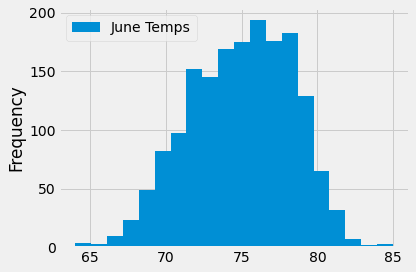

In [23]:
# Histogram plot of June data
june_df.plot.hist(bins=20)
plt.tight_layout()

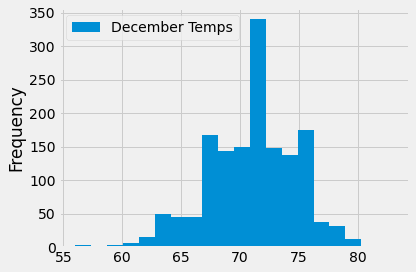

In [24]:
# Histogram plot of December data
december_df.plot.hist(bins=20)
plt.tight_layout()

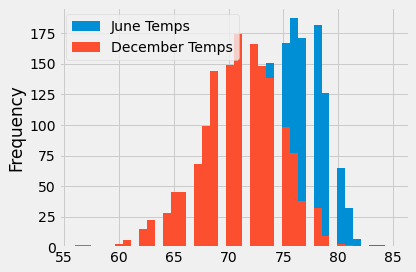

In [29]:
# Histogram plot of June and December together
joint_df = june_df.merge(december_df, left_index=True, right_index=True)
joint_df.plot.hist(bins=40)
plt.tight_layout()

In [39]:
joint_df

,date_x,June Temps,date_y,December Temps
0,2010-06-01,78.0,2010-12-01,76.0
1,2010-06-02,76.0,2010-12-03,74.0
2,2010-06-03,78.0,2010-12-04,74.0
3,2010-06-04,76.0,2010-12-06,64.0
4,2010-06-05,77.0,2010-12-07,64.0
...,...,...,...,...
1512,2011-06-14,71.0,2016-12-27,71.0
1513,2011-06-15,73.0,2016-12-28,71.0
1514,2011-06-16,72.0,2016-12-29,69.0
1515,2011-06-17,74.0,2016-12-30,65.0


In [35]:
# Joint scatter plot
color1=(0.69411766529083252, 0.3490196168422699, 0.15686275064945221, 1.0)
color2=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)

colormap = {'June Temps':'red','Decemver Temps':'blue'}

# plt.scatter(a[0], a[1], s=500, c=colormap[categories])


joint_df.plot.scatter(x = 'June Temps', y= 'December Temps', s = 100, c=joint_df.map(colormap) )
#plt.scatter(june_df, december_df)
#plt.show()


AttributeError: 'DataFrame' object has no attribute 'map'

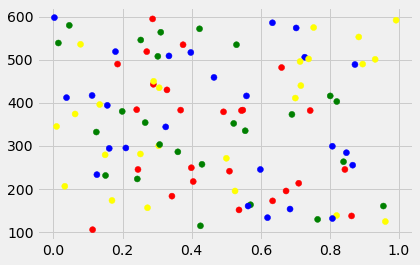

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

population = np.random.rand(100)
Area = np.random.randint(100,600,100)
continent =['North America','Europe', 'Asia', 'Australia']*25

df = pd.DataFrame(dict(population=population, Area=Area, continent = continent))

fig, ax = plt.subplots()

colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}


ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))

plt.show()

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

population = np.random.rand(100)
Area = np.random.randint(100,600,100)
continent =['June Temps','December Temps']*25

df = pd.DataFrame(dict(population=population, Area=Area, continent = continent))

fig, ax = plt.subplots()

colors = {'June Temps':'red', 'December Temps':'green'}


ax.scatter(df['June Temps'], df['December Temps'], c=df['continent'].map(colors))

plt.show()

ValueError: All arrays must be of the same length

In [43]:
# rng = np.random.RandomState(0)
x = joint_df['June Temps']
y = joint_df['December Temps']
colors = {'June Temps':'red', 'December Temps':'blue'}

plt.scatter(x, y, s=100, alpha=0.3,
            c= joint_df['June Temps', 'December Temps'].map(colors))
plt.colorbar();  

KeyError: ('June Temps', 'December Temps')

In [ ]:
plt.scatter(y_axis, x_axis, color='Red', label='Chicago')
plt.title("PyBer Fare by Month")
plt.ylabel("Date")
plt.xlabel("Fare ($)")
plt.gca().invert_yaxis()
plt.xlim(0, 50)
# plt.ylim('Jan', 'May') <== Limits the months displayed o vertical axis
# Add the legend.
plt.legend()
plt.show()